# Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

# 0/ Collect data

In this article, we will use the data already collected as the attached "mvt.csv" file; This is the data of the crime of car theft in the city of Chicago, Illinois, USA ("mvt" stands for "motor vehicle theft"). This data is taken from the course "The Analytics Edge" at edx.org, check the link [here](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2).

In [5]:
!wget https://raw.githubusercontent.com/the0nlyWyvern/DataAnalysis-MotorVehicleTheft/main/data.csv

--2023-01-31 06:22:14--  https://raw.githubusercontent.com/the0nlyWyvern/DataAnalysis-MotorVehicleTheft/main/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15737407 (15M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]  15.01M  59.4MB/s    in 0.3s    

2023-01-31 06:22:14 (59.4 MB/s) - ‘data.csv.1’ saved [15737407/15737407]



---

# 1/ Explore the data

## 1.1/ Load into dataframe

In [6]:
mvt_df = pd.read_csv('data.csv')
mvt_df.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012,41.756284,-87.621645
1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012,41.898788,-87.661303
2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012,41.969186,-87.767670
3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012,41.769329,-87.657726
4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012,41.837568,-87.621761


## 1.2/ How many rows and columns?

In [7]:
num_rows, num_cols = mvt_df.shape
print(num_rows)
print(num_cols)

191641
11


## 1.3/ What does each line mean? Does it matter the lines have different meanings?

According to the data description of the course "The Analytics Edge" and according to the preliminary observation of the data, a line indicates the information of a crime.

## 1.4/ Does the data have duplicate lines?

In [9]:
have_duplicated_rows = False if mvt_df.duplicated().sum() == 0 else True

## 1.5/ What does each column mean?

Here is the description of the "The Analytics Edge" course about the columns in the "mvt.csv" file:
- **ID**: a unique identifier for each observation.
- **Date**: the date the crime occurred.
- **LocationDescription**: the location where the crime occurred.
- **Arrest**: whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made).
- **Domestic**: whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic).
- **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- **District**: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
- **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.
- **Year**: the year in which the crime occurred.
- **Latitude**: the latitude of the location at which the crime occurred.
- **Longitude**: the longitude of the location at which the crime occurred.

## 1.6/ What data type does each column currently have? Is there a column with a data type that is not suitable for further processing?

In [40]:
mvt_df.dtypes

ID                              int64
Date                   datetime64[ns]
LocationDescription            object
Arrest                           bool
Domestic                         bool
Beat                            int64
District                      float64
CommunityArea                 float64
Year                            int64
Latitude                      float64
Longitude                     float64
Month                           int64
dtype: object

**Cột có dtype là object nghĩa là sao?**

`mvt_df` có 4 cột có `dtype` là `object`: "Date", "LocationDescription", "District", "CommunityArea". Trong Pandas, kiểu dữ liệu `object` thường ám chỉ chuỗi, nhưng thật ra kiểu dữ liệu `object` có thể chứa một đối tượng bất kỳ trong Python (vì thật ra ở bên dưới kiểu dữ liệu `object` chứa địa chỉ). Nếu một cột trong dataframe có `dtype` là `object` thì có thể các phần tử trong cột này sẽ có kiểu dữ liệu khác nhau; để biết được kiểu dữ liệu thật sự của các phần tử trong cột này thì ta phải truy xuất vào từng phần tử và dùng câu lệnh `type` để xem kiểu dữ liệu, ví dụ `type(s.iloc[i])` với `s` là một cột. Lúc đọc dữ liệu từ file "mvt.csv" lên, nếu bạn để ý thì sẽ thấy warning là: "Columns (6,7) have mixed types", nghĩa là cột 6 ("District") và 7 ("CommunityArea") có `dtype` không đồng nhất (trong nội bộ mỗi cột). Ta muốn xem thử trong nội bộ mỗi cột này có các kiểu dữ liệu nào.

Công việc của bạn là viết hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này. Trong hàm này, bạn có thể dùng phương thức `apply` của series.

In [13]:
def open_object_dtype(s):
    dtypes = set()
    d = s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [41]:
for i in mvt_df.columns:
    print(open_object_dtype(mvt_df[i]))

{<class 'int'>}
{<class 'pandas._libs.tslibs.timestamps.Timestamp'>}
{<class 'str'>}
{<class 'bool'>}
{<class 'bool'>}
{<class 'int'>}
{<class 'float'>}
{<class 'float'>}
{<class 'int'>}
{<class 'float'>}
{<class 'float'>}
{<class 'int'>}


In [14]:
# TEST
assert open_object_dtype(mvt_df['Date']) == {str}
assert open_object_dtype(mvt_df['LocationDescription']) == {str}
assert open_object_dtype(mvt_df['District']) == {str, float}
assert open_object_dtype(mvt_df['CommunityArea']) == {str, float}

---

# 2/ Clean the data

## 2.1/ Change dtype of column __Date__ to _datetime_

In [15]:
mvt_df['Date'] = pd.to_datetime(mvt_df['Date'], format="%m/%d/%y %H:%M")

## 2.2/ Change dtype of column __District__ & __CommunityArea__ to _float_

In [17]:
mvt_df['District'] = mvt_df['District'].replace(" ", np.nan)
mvt_df['CommunityArea'] = mvt_df['CommunityArea'].replace(" ", np.nan)

mvt_df = mvt_df.astype({"District": np.float64, "CommunityArea": np.float64})

## 2.3/ For each column with a numeric data type, how are the values distributed?

In [19]:
cols = ["Date", "Year", "Latitude", "Longitude"]
nume_col_profiles_df = pd.DataFrame(index=["missing_ratio", "min", "max"])

def create_nume_col_profiles_df(df, col_name:str):
    df.at["missing_ratio", col_name] = mvt_df[col_name].isna().sum() * 100/ len(mvt_df[col_name])
    df.at["min", col_name] = mvt_df[col_name].min()
    df.at["max", col_name] = mvt_df[col_name].max()

create_nume_col_profiles_df(nume_col_profiles_df, "Date")
create_nume_col_profiles_df(nume_col_profiles_df, "Year")
create_nume_col_profiles_df(nume_col_profiles_df, "Latitude")
create_nume_col_profiles_df(nume_col_profiles_df, "Longitude")

print(nume_col_profiles_df)

                              Date    Year   Latitude  Longitude
missing_ratio                  0.0     0.0   1.187637   1.187637
min            2001-01-01 00:01:00  2001.0  41.644710 -87.925510
max            2012-12-31 23:15:00  2012.0  42.022878 -87.524676


The min and max of the columns don't seem unusual.

## 2.4/ For each column with a categorical data type, how are the values distributed?

In [21]:
cate_col_profiles_df = pd.DataFrame(index=["missing_ratio", "num_diff_vals", "diff_vals"], dtype=object)

def create_cate_col_profiles_df(col_name:str):
    cate_col_profiles_df.loc["missing_ratio", col_name] = mvt_df[col_name].isna().sum() * 100 / num_rows

    cate_col_profiles_df.loc["num_diff_vals", col_name] = mvt_df[col_name].nunique()

    cate_col_profiles_df[col_name] = cate_col_profiles_df[col_name].astype(object)
    cate_col_profiles_df.at["diff_vals", col_name] = mvt_df[col_name].dropna().unique()

create_cate_col_profiles_df("ID")
create_cate_col_profiles_df("LocationDescription")
create_cate_col_profiles_df("Arrest")
create_cate_col_profiles_df("Domestic")
create_cate_col_profiles_df("Beat")
create_cate_col_profiles_df("District")
create_cate_col_profiles_df("CommunityArea")

print(cate_col_profiles_df)

                                                              ID  \
missing_ratio                                                0.0   
num_diff_vals                                           191641.0   
diff_vals      [8951354, 8951141, 8952745, 8952223, 8951608, ...   

                                             LocationDescription  \
missing_ratio                                                0.0   
num_diff_vals                                               78.0   
diff_vals      [STREET, RESIDENTIAL YARD (FRONT/BACK), GAS ST...   

                      Arrest       Domestic  \
missing_ratio            0.0            0.0   
num_diff_vals            2.0            2.0   
diff_vals      [False, True]  [False, True]   

                                                            Beat  \
missing_ratio                                                0.0   
num_diff_vals                                              300.0   
diff_vals      [623, 1213, 1622, 724, 211, 2521, 423, 231, 10

## 2.5/ More clarification on the meaning of the columns "Beat", "District", "CommunityArea"

As described by the course "The Analytics Edge":
- **Beat**: the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.
- **District**: the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.
- **CommunityArea**: the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

Thus, "Beat" is the smallest unit, "District" is composed of many "Beats". So are the "Districts" not overlapping with each other? (There is no case that a "Beat" is both in this "District" and in the other "District"). And each "CommunityArea" is composed of multiple "Beat" and also does not overlap with each other?

To answer these two questions, below we will calculate the ratio (from 0 to 1) of "Beats" that belong to more than one "District", and the ratio of "Beats" that belong to more than one "CommunityArea" . Then store the results in two variables, `multi_district_ratio` and `multi_comarea_ratio`, respectively.

In [23]:
def cal_overlap(col1, col2):
    df_col1_col2 = mvt_df[[col1, col2]].dropna(how="any").drop_duplicates()
    overlap = df_col1_col2.groupby(col1).count().apply(lambda x: x > 1).value_counts()
    return overlap[True] / (overlap[True] + overlap[False])

multi_district_ratio = cal_overlap("Beat", "District")
multi_comarea_ratio = cal_overlap("Beat", "CommunityArea")

In [42]:
print(multi_district_ratio)
print(multi_comarea_ratio)

0.21
0.6033333333333334


---

# 3/ Get data insight through questions

## 3.1/ Data preprocessing

### Add column "Month" into dataframe

In [25]:
mvt_df["Month"] = pd.DatetimeIndex(mvt_df['Date']).month

---

## 3.2/ How does the number of crimes change from year to year?

In [27]:
num_thefts_each_year = mvt_df["Date"].groupby(by=pd.DatetimeIndex(mvt_df["Date"]).year).count()

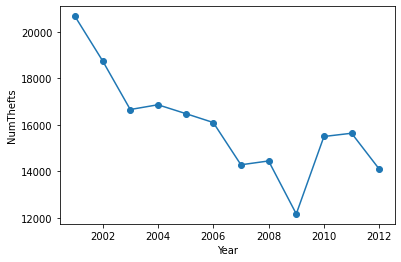

In [29]:
plt.plot(num_thefts_each_year, marker="o")
plt.xlabel("Year")
plt.ylabel("NumThefts")
plt.show()

Hmm, in the US, there was an economic crisis in 2008-2009, I don't know if it has anything to do with it...

## 3.3/ Given the cases that happen each year, what is the percentage of the perpetrators caught by the time the data is collected?

In [30]:
df1 = mvt_df[mvt_df["Arrest"] == True][["Year", "Arrest"]].groupby(["Year"]).count()
df2 = mvt_df[["Year", "Arrest"]].groupby("Year").count()
arrest_ratio_each_year = df1.div(df2).squeeze() # dataframe -> series using squeeze

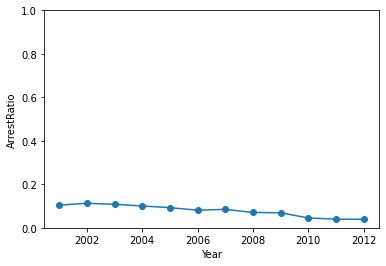

In [32]:
plt.plot(arrest_ratio_each_year, marker="o")
plt.xlabel("Year")
plt.ylabel("ArrestRatio")
plt.ylim([0,1])
plt.show()

__Q.__ You will see the overall arrest rate decrease in recent years. Why is that? In general, we don't know for sure. But you try to think and come up with a hypothesis to explain this trend based on the following information: the year here is the year the crime occurred, caught or not caught is up to the time the data was collected. collected (this data was collected around 2012-2013, at the opening of the "The Analytics Edge" course).

__A.__ The longer the time from crime to collection, the higher the chance of being caught. The time from 2001 is a long time compared to 2012. Because the investigation cases can take many years, for example the 2012 cases have only passed 1 year, there is not enough time to arrest.

## 3.4/  In each year, which "Beat" has the most crimes and which "Beat" has the fewest?

In [33]:
#get dangerous beat
dangerous_df1 = mvt_df[["Year", "Beat", "ID"]].groupby(["Year","Beat"]).count().reset_index()
df2 = dangerous_df1.groupby("Year").idxmax()
dangerous_df1 = dangerous_df1.iloc[df2["ID"]].rename(columns={"Beat":"DangerousBeat"})
dangerous_df1.set_index("Year",inplace=True)

#get safe beat
safe_df1 = mvt_df[["Year", "Beat", "ID"]].groupby(["Year","Beat"]).count().reset_index()
df2 = safe_df1.groupby("Year").idxmin()
safe_df1 = safe_df1.iloc[df2["ID"]].rename(columns={"Beat":"SafeBeat"})
safe_df1.set_index("Year",inplace=True)

#combine 2 dataframes
safe_df1["DangerousBeat"] = dangerous_df1["DangerousBeat"]
two_beats_each_year_df = safe_df1.drop("ID", axis=1)


print(two_beats_each_year_df)

      SafeBeat  DangerousBeat
Year                         
2001       134            833
2002      1833            833
2003       123            815
2004      1914           2413
2005       130           1723
2006       123            831
2007       112            823
2008       235            831
2009      1235           2512
2010       121            823
2011       114            912
2012       134            824


## 3.5/ In the last 3 years, what 5 types of locations (off-streets, parking spaces, ...) have the most crime?

In [35]:
#get list of last 3 years [2010, 2011, 2012]
year_max = mvt_df["Date"].max().year
last_3_years = list(range(year_max-2, year_max + 1))

#get df of lats 3 years
last_3_years_df = mvt_df[pd.DatetimeIndex(mvt_df["Date"]).year.isin(last_3_years)]
last_3_years_df = last_3_years_df[["ID", "LocationDescription"]]

last_3_years_df = last_3_years_df.groupby("LocationDescription").count()#"ID" col is "count" col
last_3_years_df.drop(index="OTHER", axis=1,inplace=True)
last_3_years_df.sort_values("ID", ascending=False, inplace=True)


top5_locs = list(last_3_years_df.iloc[0:5].index)

In [43]:
top5_locs

['STREET',
 'PARKING LOT/GARAGE(NON.RESID.)',
 'RESIDENTIAL YARD (FRONT/BACK)',
 'VEHICLE NON-COMMERCIAL',
 'ALLEY']

## 3.6/ In each of the last 3 years, how did the number of crimes change month-on-month?

Code bước 1. 

In [37]:
#get list of last 3 years [2010, 2011, 2012]
year_max = mvt_df["Date"].max().year
last_3_years = list(range(year_max-2, year_max + 1))

#get df of lats 3 years
last_3_years_df = mvt_df[pd.DatetimeIndex(mvt_df["Date"]).year.isin(last_3_years)]
last_3_years_df = last_3_years_df[["Year", "ID", "Month"]]

last_3_years_df = last_3_years_df.groupby(["Year", "Month"]).count().reset_index()
num_thefts_each_month_df = last_3_years_df.pivot_table(values="ID", index="Month", columns="Year")

print(num_thefts_each_month_df)

Year   2010  2011  2012
Month                  
1      1278  1508  1253
2       883  1049  1019
3      1115  1355  1187
4      1146  1373  1132
5      1394  1447  1231
6      1203  1443  1238
7      1261  1384  1166
8      1301  1227  1126
9      1420  1143  1082
10     1447  1194  1180
11     1469  1269  1231
12     1580  1245  1247


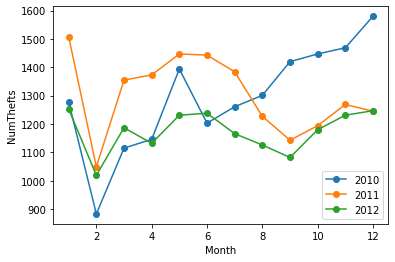

In [39]:
plt.plot(num_thefts_each_month_df, marker="o")
plt.xlabel("Month")
plt.ylabel("NumThefts")
plt.legend(last_3_years);
plt.show()